In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

In [2]:
xls = pd.ExcelFile('../../../data/raw/partner_iii/Dati CADD 2020-2022.xlsx', engine='openpyxl')

In [3]:
xls.sheet_names

['2020-2022']

In [4]:
df = pd.read_excel(xls, '2020-2022')

<h1>Exploratory Data Analysis - EDA - Cement Data from partner_iii Factory - Italy</h1>

<h2>Shape, feature information and some samples</h2>

In [5]:
df.shape

(637, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID sample                                637 non-null    int64  
 1   Description                              637 non-null    object 
 2   Clinker (%)                              637 non-null    float64
 3   Gypsum (%)                               637 non-null    float64
 4   Limestone (%)                            246 non-null    float64
 5   Pozzolan (%)                             25 non-null     float64
 6   Slag (%)                                 37 non-null     float64
 7   Fly ash (%)                              33 non-null     float64
 8   Other (%)                                64 non-null     object 
 9   Blaine specific surface (cm2/g)          130 non-null    float64
 10  Alpine residual 32µm (%)                 210 non-n

In [7]:
df.head()

,ID sample,Description,Clinker (%),Gypsum (%),Limestone (%),Pozzolan (%),Slag (%),Fly ash (%),Other (%),Blaine specific surface (cm2/g),...,2d compressive strength (MPa),3d compressive strength (MPa),7d compressive strength (MPa),28d compressive strength (MPa),Mixing water for normal consistency (%),Initial setting time (min),Final setting time (min),Flow (%),Flow at 30 min (%),Flow at 60 min (%)
0,1,CEM I,95.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,27.9,NaN,NaN,55.6,NaN,NaN,NaN,NaN,NaN,NaN
1,2,CEM I,95.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,25.6,NaN,NaN,53.5,NaN,NaN,NaN,NaN,NaN,NaN
2,3,CEM I,95.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,27.2,NaN,NaN,50.2,NaN,NaN,NaN,NaN,NaN,NaN
3,4,CEM I,95.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,26.0,NaN,NaN,53.2,NaN,NaN,NaN,NaN,NaN,NaN
4,5,CEM I,95.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,26.5,NaN,NaN,52.3,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.tail()

,ID sample,Description,Clinker (%),Gypsum (%),Limestone (%),Pozzolan (%),Slag (%),Fly ash (%),Other (%),Blaine specific surface (cm2/g),...,2d compressive strength (MPa),3d compressive strength (MPa),7d compressive strength (MPa),28d compressive strength (MPa),Mixing water for normal consistency (%),Initial setting time (min),Final setting time (min),Flow (%),Flow at 30 min (%),Flow at 60 min (%)
632,633,CEM I,95.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633,634,CEM I,95.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
634,635,CEM II/A-S,80.0,5.0,3.0,NaN,12.0,NaN,NaN,NaN,...,32.2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
635,636,CEM II/A-S,80.0,5.0,3.0,NaN,12.0,NaN,NaN,NaN,...,33.9625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636,637,CEM II/A-S,80.0,5.0,3.0,NaN,12.0,NaN,NaN,NaN,...,33.2550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df.drop('ID sample', axis=1)

<h2>1. Structure Investigation</h2>

In [10]:
df.dtypes.value_counts()

float64    23
object      2
dtype: int64

<h3>1.1 Structure of numerical features</h3>

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clinker (%),637.0,87.677912,11.969765,27.00,80.000000,95.00,95.0000,97.50
Gypsum (%),637.0,4.644537,0.823144,1.75,4.500000,5.00,5.0000,7.70
Limestone (%),246.0,12.675610,8.207506,2.00,6.000000,11.70,15.0000,37.50
Pozzolan (%),25.0,13.952000,6.124685,8.50,9.800000,15.00,16.0000,28.00
Slag (%),37.0,22.297297,22.400229,3.00,12.000000,13.00,24.0000,70.00
Fly ash (%),33.0,9.090909,3.923994,5.00,5.000000,8.00,10.0000,15.00
Blaine specific surface (cm2/g),130.0,4126.353846,737.857919,2596.00,3553.000000,4085.50,4534.0000,6392.00
Alpine residual 32µm (%),210.0,21.140036,7.332512,3.40,15.844075,20.05,26.5875,42.80
Alpine residual 40µm (%),210.0,12.794385,6.516027,1.45,8.162500,10.60,17.1250,32.00
Alpine residual 63µm (%),177.0,3.489729,3.101995,0.00,1.400000,2.35,4.5500,14.65


In [12]:
df.groupby('Description').describe().T

Description               CEM HE       CEM I  CEM II  CEM II/A-L  CEM II/A-LL  \
Clinker (%)        count     5.0  384.000000     2.0   71.000000    37.000000   
                   mean     80.0   94.523021    84.7   80.228451    81.376216   
                   std       0.0    1.481257     0.0    3.575392     2.463820   
                   min      80.0   88.400000    84.7   73.500000    77.730000   
                   25%      80.0   95.000000    84.7   78.000000    80.000000   
...                          ...         ...     ...         ...          ...   
Flow at 60 min (%) min       NaN   93.000000     NaN         NaN          NaN   
                   25%       NaN   97.500000     NaN         NaN          NaN   
                   50%       NaN   99.000000     NaN         NaN          NaN   
                   75%       NaN   99.250000     NaN         NaN          NaN   
                   max       NaN  100.000000     NaN         NaN          NaN   

Description               CEM II/A-M (L-V)  CEM II/A-P  CEM II/A-S  \
Clinker (%)        count               5.0   11.000000   12.000000   
                   mean               80.0   82.090909   80.566667   
                   std                 0.0    2.193378    1.304073   
                   min                80.0   79.800000   79.200000   
                   25%                80.0   79.800000   79.200000   
...                                    ...         ...         ...   
Flow at 60 min (%) min                 NaN         NaN         NaN   
                   25%                 NaN         NaN         NaN   
                   50%                 NaN         NaN         NaN   
                   75%                 NaN         NaN         NaN   
                   max                 NaN         NaN         NaN   

Description               CEM II/B-L  CEM II/B-M  ...  CEM II/C-M (P-LL)  \
Clinker (%)        count   10.000000         1.0  ...                3.0   
                   mean    64.050000        72.5  ...               50.0   
                   std      3.425801         NaN  ...                0.0   
                   min     60.800000        72.5  ...               50.0   
                   25%     60.800000        72.5  ...               50.0   
...                              ...         ...  ...                ...   
Flow at 60 min (%) min           NaN         NaN  ...                NaN   
                   25%           NaN         NaN  ...                NaN   
                   50%           NaN         NaN  ...                NaN   
                   75%           NaN         NaN  ...                NaN   
                   max           NaN         NaN  ...                NaN   

Description               CEM III   CPJ     Cement  Cement CPA  Cemento GP  \
Clinker (%)        count      6.0   8.0  11.000000         8.0         7.0   
                   mean      27.0  73.1  59.272727        97.0        89.0   
                   std        0.0   0.0   8.877960         0.0         0.0   
                   min       27.0  73.1  50.000000        97.0        89.0   
                   25%       27.0  73.1  50.000000        97.0        89.0   
...                           ...   ...        ...         ...         ...   
Flow at 60 min (%) min        NaN   NaN        NaN         NaN         NaN   
                   25%        NaN   NaN        NaN         NaN         NaN   
                   50%        NaN   NaN        NaN         NaN         NaN   
                   75%        NaN   NaN        NaN         NaN         NaN   
                   max        NaN   NaN        NaN         NaN         NaN   

Description                  GL Cement  GP Cement  GU Cement        OPC  
Clinker (%)        count  1.000000e+01        2.0        5.0  20.000000  
                   mean   8.080000e+01       87.9       42.0  93.752500  
                   std    1.497956e-14        0.0        0.0   1.682689  
                   min    8.080000e+01  

<h3>1.2 Structure of categorical features</h3>

In [13]:
df.describe(exclude='number').T

,count,unique,top,freq
Description,637,24,CEM I,384
Other (%),64,13,"0,2% FeSO4x7H20 + 0,1% Dust",10


In [14]:
df.groupby('Description').describe(exclude='number').T

Description      CEM HE                                         CEM I  \
Other (%) count       0                                            18   
          unique      0                                             4   
          top       NaN  3,3% Anhydrit, 1,5% Bypass dust, 3,5% Filler   
          freq      NaN                                             5   

Description           CEM II          CEM II/A-L                  CEM II/A-LL  \
Other (%) count            2                  13                           14   
          unique           1                   2                            2   
          top     0,7% FeSO4  0,7% iron sulphate  0,2% FeSO4x7H20 + 0,1% Dust   
          freq             2                   8                           10   

Description      CEM II/A-M (L-V) CEM II/A-P CEM II/A-S CEM II/B-L CEM II/B-M  \
Other (%) count                 0          0          0          0          0   
          unique                0          0          0          0          0   
          top                 NaN        NaN        NaN        NaN        NaN   
          freq                NaN        NaN        NaN        NaN        NaN   

Description       ... CEM II/C-M (P-LL) CEM III  CPJ        Cement Cement CPA  \
Other (%) count   ...                 0       0    0            11          0   
          unique  ...                 0       0    0             2          0   
          top     ...               NaN     NaN  NaN  Basalt 10,5%        NaN   
          freq    ...               NaN     NaN  NaN             6        NaN   

Description      Cemento GP GL Cement GP Cement GU Cement            OPC  
Other (%) count           0         0         0         0              1  
          unique          0         0         0         0              1  
          top           NaN       NaN       NaN       NaN  Anhydrite 4,2  
          freq          NaN       NaN       NaN       NaN              1  

[4 rows x 24 columns]

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<AxesSubplot:title={'center':'Unique Values per feature'}>

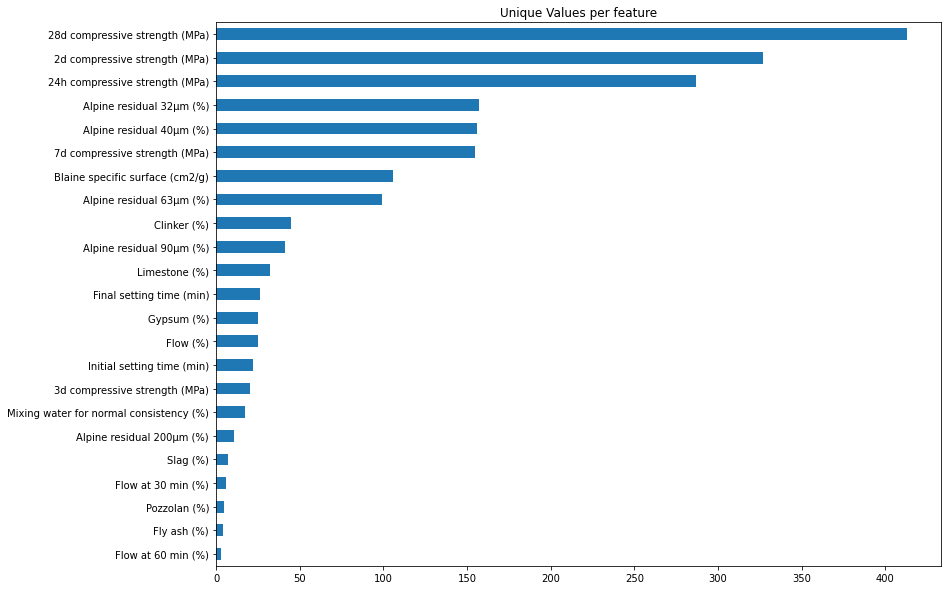

In [15]:
unique_values = df.select_dtypes(include='number').nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title='Unique Values per feature')

(array([0, 1]), [Text(0, 0, 'Other (%)'), Text(1, 0, 'Description')])

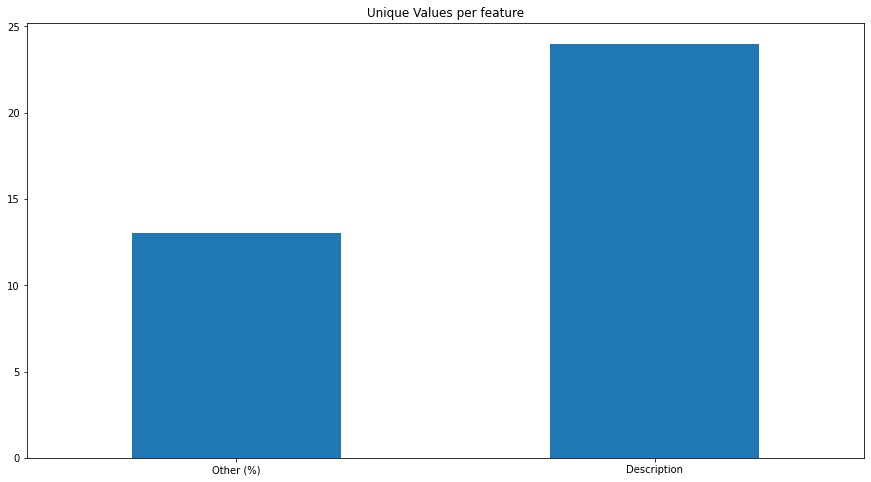

In [16]:
unique_values = df.select_dtypes(exclude='number').nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title='Unique Values per feature')

plt.xticks(rotation=0)

In [17]:
df['Description'].unique()

array(['CEM I', 'OPC', 'Cement CPA', 'CEM II/A-LL', 'CEM II/A-S',
       'CEM II/B-M (V-LL)', 'CEM II/A-L', 'CEM II/A-P', 'CEM HE',
       'GL Cement', 'GP Cement', 'CPJ', 'CEM III', 'CEM II/B-L', 'Cement',
       'CEM II/B-S', 'CEM II', 'GU Cement', 'CEM II/B-M (P-W-LL)',
       'CEM II/B-M (P-LL)', 'CEM II/A-M (L-V)', 'CEM II/B-M',
       'CEM II/C-M (P-LL)', 'Cemento GP'], dtype=object)

In [18]:
df['Description'].nunique()

24

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Cement Type - Countplot'}, xlabel='Description', ylabel='count'>

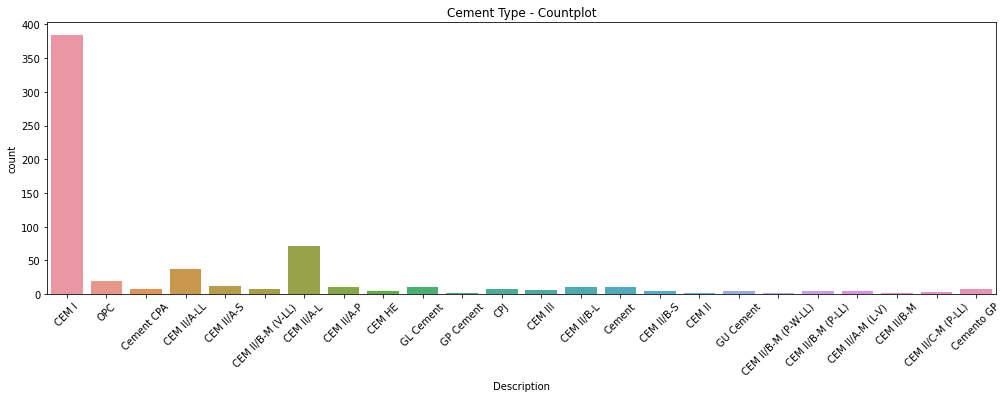

In [19]:
plt.figure(figsize=(17, 5))
plt.xticks(rotation=45)
plt.title('Cement Type - Countplot')
sns.countplot(df['Description'])

In [20]:
df['Other (%)'].unique()

array([nan, 'Anhydrite 4,2', 'Anhydrite 3,4', 'Anhydrite 3,2',
       'Anhydrite 3,5', '2,70 Anidrite', 'Trass 10,0%', 'Basalt 10,5%',
       '0,7% iron sulphate',
       '3,3% Anhydrit, 1,5% Bypass dust, 3,5% Filler',
       '2,8% Anhydrit, 1,5% Bypass dust, 3,5% Filler',
       '2,5% Anhydrit, 1,5% Bypass dust, 3,5% Filler', '0,7% FeSO4',
       '0,2% FeSO4x7H20 + 0,1% Dust'], dtype=object)

In [21]:
df['Other (%)'].nunique()

13

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Other Chemical input- Countplot'}, xlabel='Other (%)', ylabel='count'>

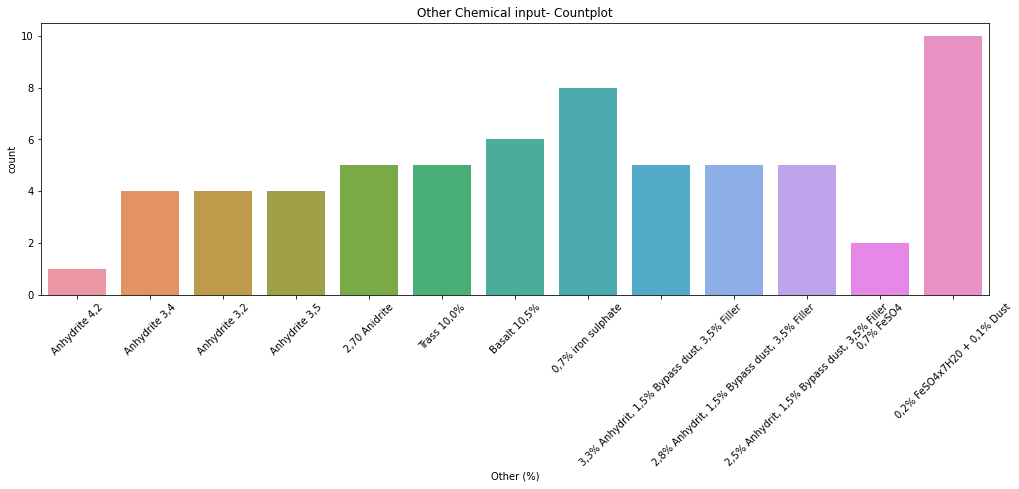

In [22]:
plt.figure(figsize=(17, 5))
plt.xticks(rotation=45)
plt.title('Other Chemical input- Countplot')
sns.countplot(df['Other (%)'])

<h3>2.2. Missing values</h3>

In [23]:
print("There are", df.isna().any().sum(), "variables with missing values from a total of", df.shape[1])

There are 22 variables with missing values from a total of 25


In [24]:
df.isna().sum()

Description                                  0
Clinker (%)                                  0
Gypsum (%)                                   0
Limestone (%)                              391
Pozzolan (%)                               612
Slag (%)                                   600
Fly ash (%)                                604
Other (%)                                  573
Blaine specific surface (cm2/g)            507
Alpine residual 32µm (%)                   427
Alpine residual 40µm (%)                   427
Alpine residual 63µm (%)                   460
Alpine residual 90µm (%)                   542
Alpine residual 200µm (%)                  586
24h compressive strength (MPa)             296
2d compressive strength (MPa)              260
3d compressive strength (MPa)              616
7d compressive strength (MPa)              470
28d compressive strength (MPa)             150
Mixing water for normal consistency (%)    590
Initial setting time (min)                 563
Final setting

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of quantity of missing values')

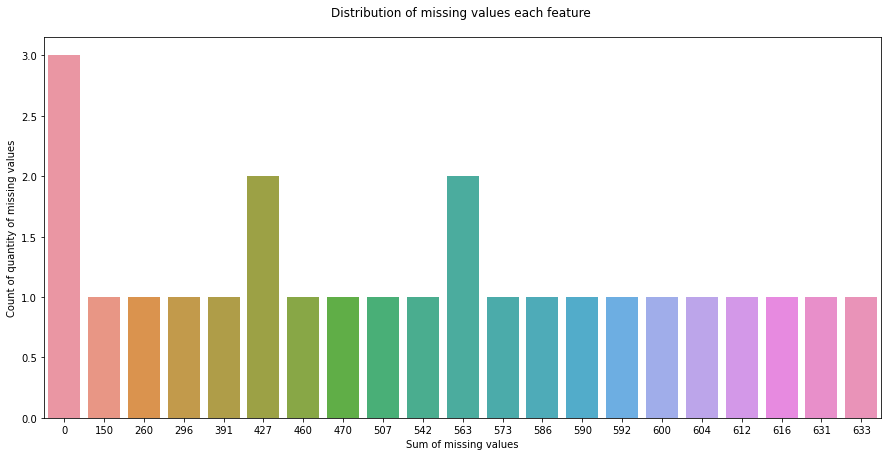

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(df.isna().sum())
plt.title('Distribution of missing values each feature \n')
plt.xlabel('Sum of missing values')
plt.ylabel('Count of quantity of missing values')

<BarContainer object of 25 artists>

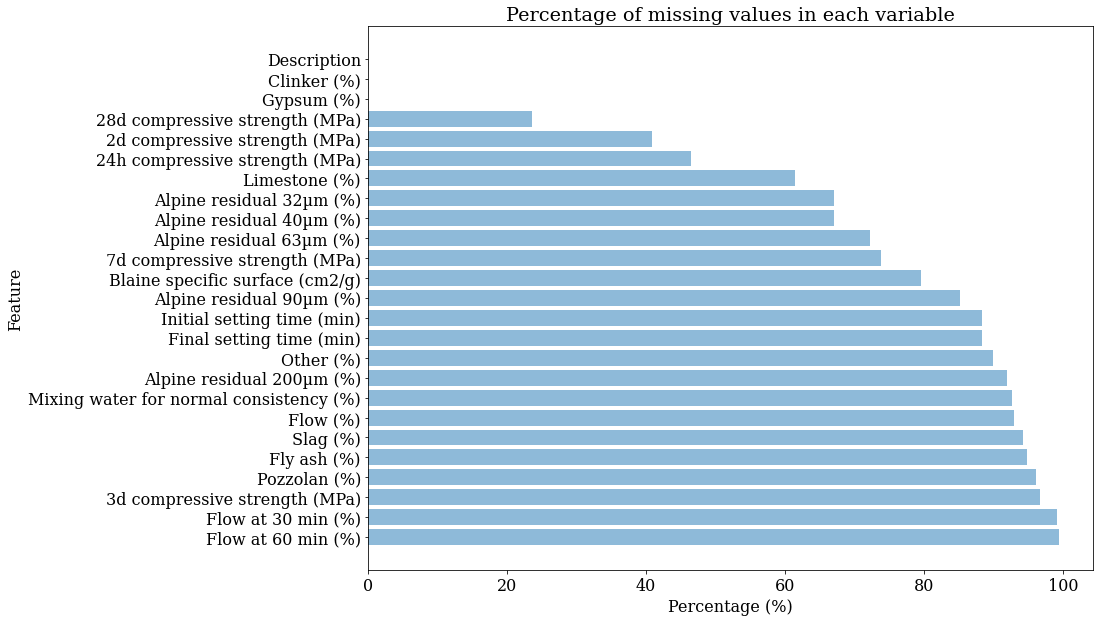

In [26]:
miss_perc = df.isnull().sum()/df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc('font', family='serif', size=16)
plt.figure(figsize=(13,10))
plt.title('Percentage of missing values in each variable')
plt.xlabel('Percentage (%)')
plt.ylabel('Feature')
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

<h3>2.3. Percentage of zeros</h3>

<BarContainer object of 25 artists>

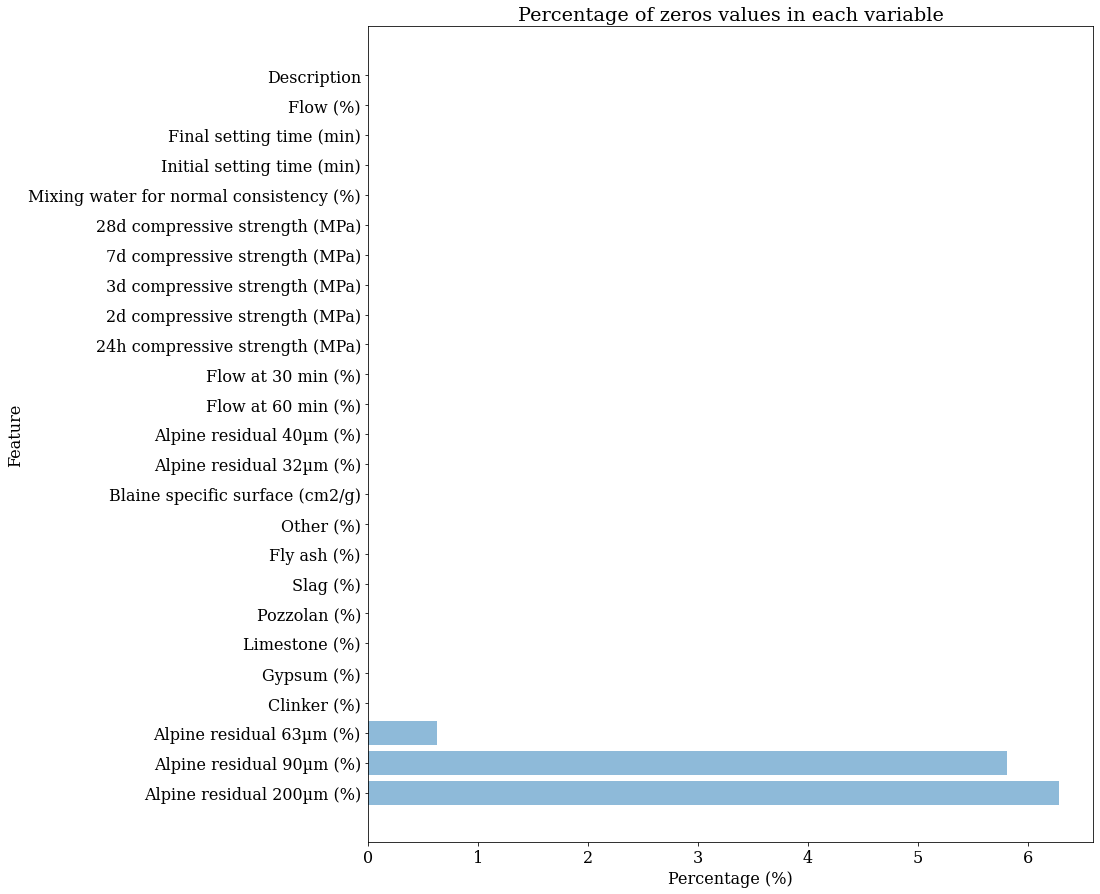

In [27]:
zeros_perc = (df == 0).sum(axis=0)/df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc('font', family='serif', size=16)
plt.figure(figsize=(13,15))
plt.title('Percentage of zeros values in each variable')
plt.xlabel('Percentage (%)')
plt.ylabel('Feature')
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [28]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

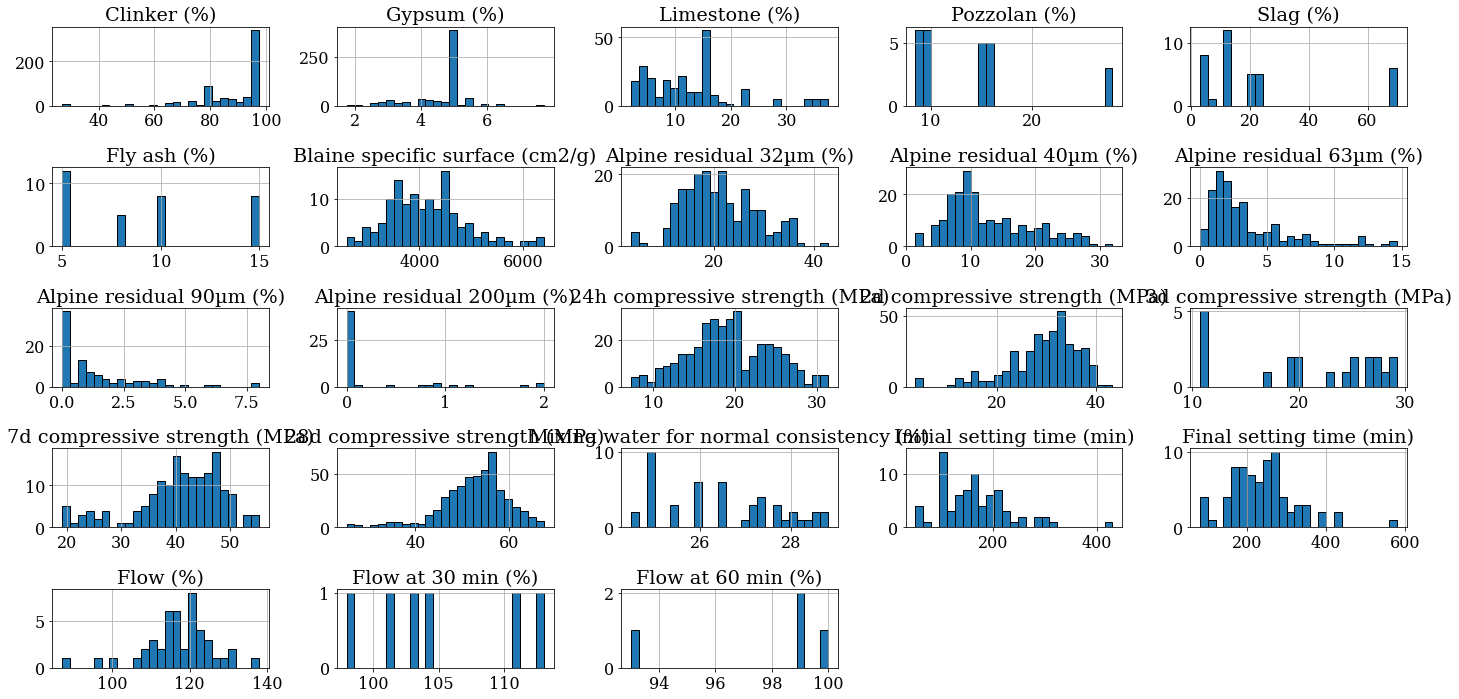

In [29]:
df.hist(bins=25, figsize=(20, 10), layout=(-1, 5), edgecolor='black')
plt.tight_layout()

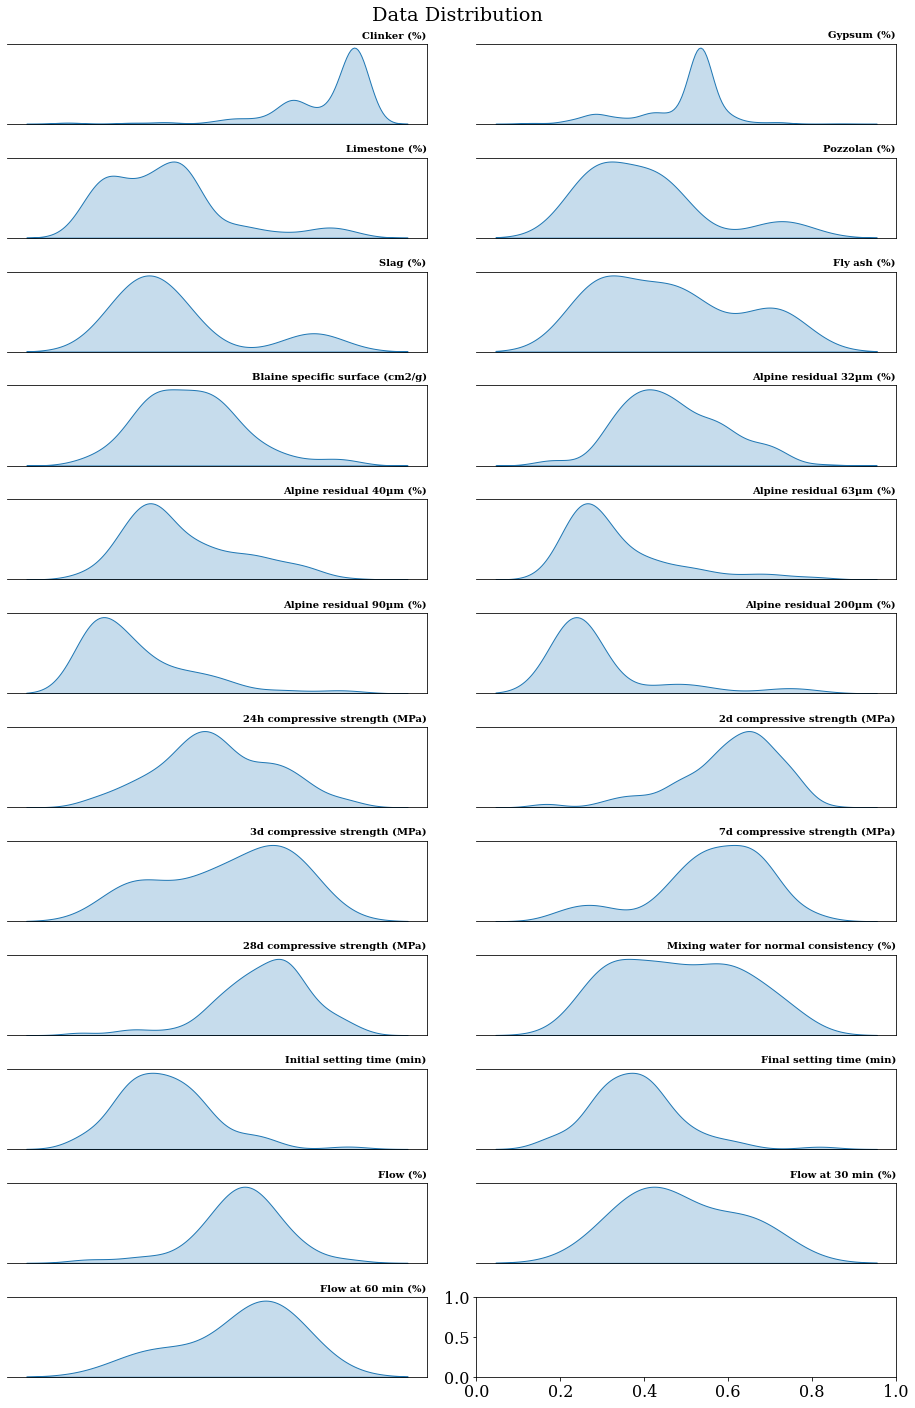

In [30]:
fig, axes = plt.subplots(12, 2,figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include='float64').columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette = ["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    ax.set_title(columns[i], loc='right', weight='bold', fontsize=10)
    if i+1 == 23:
        break

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle('Data Distribution')

fig.tight_layout()
plt.show()

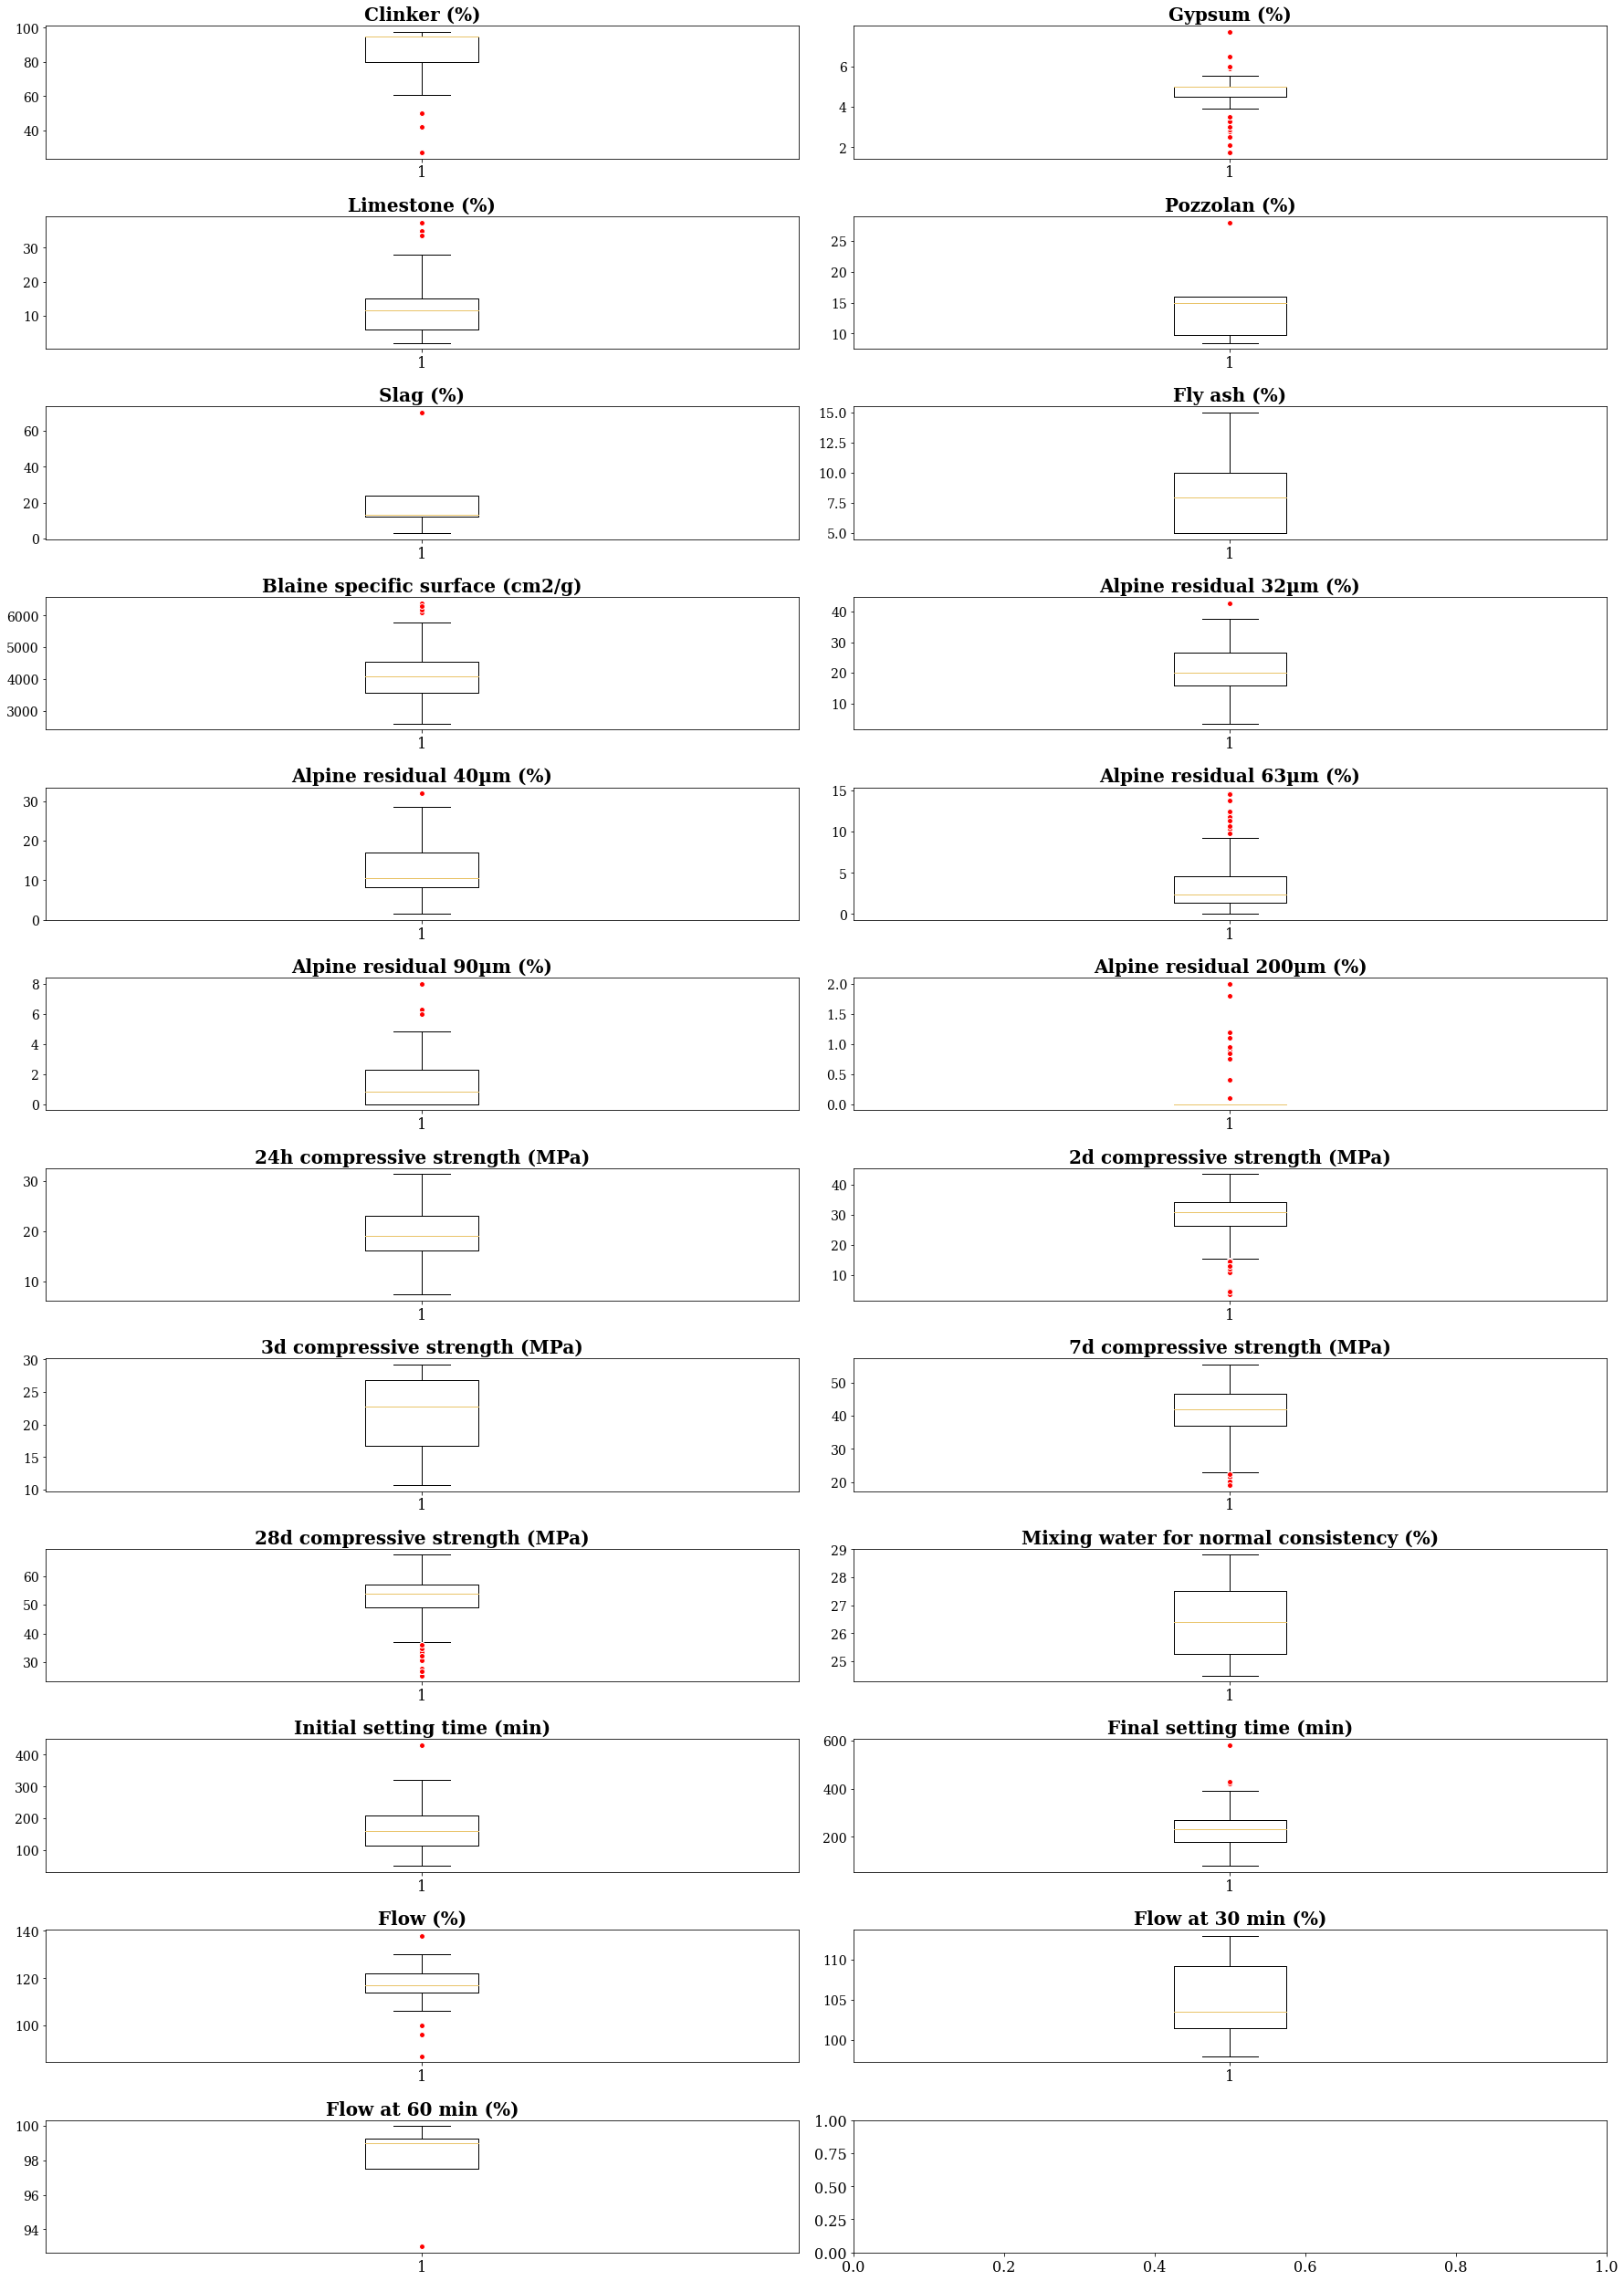

In [31]:
#Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include='float64').columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(12, 2, figsize=(25,35))

# fig, axes = plt.subplots(11, 3,figsize=(13, 20))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    if i + 1 == 23:
        break

plt.tight_layout()

<h3>3.3. Feature Relationship</h3>

<AxesSubplot:>

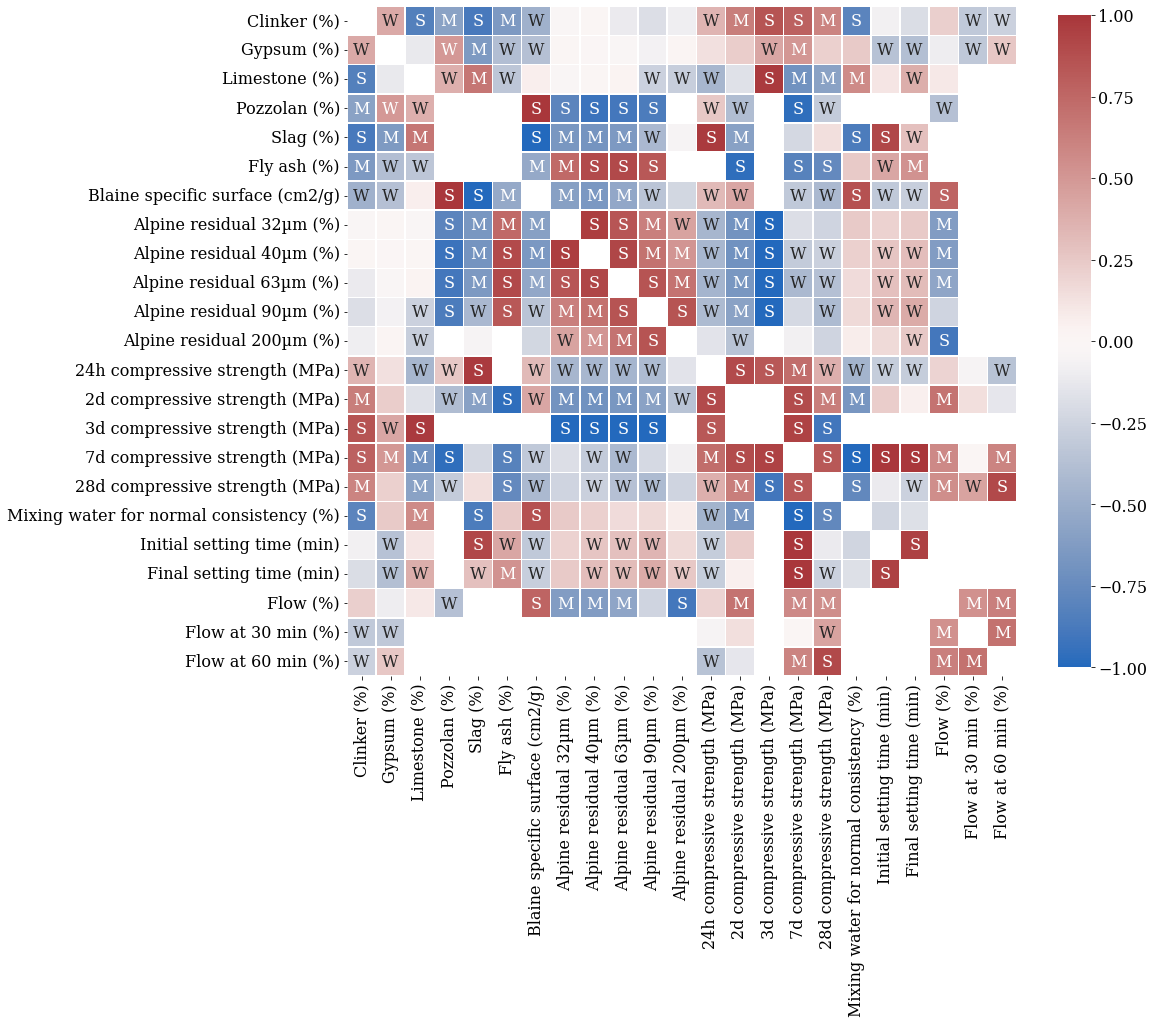

In [32]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) > 0.75,
    "S",
    np.where(np.abs(df_corr) > 0.5, "M", np.where(np.abs(df_corr) > 0.25, "W", "")),
)

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

<AxesSubplot:>

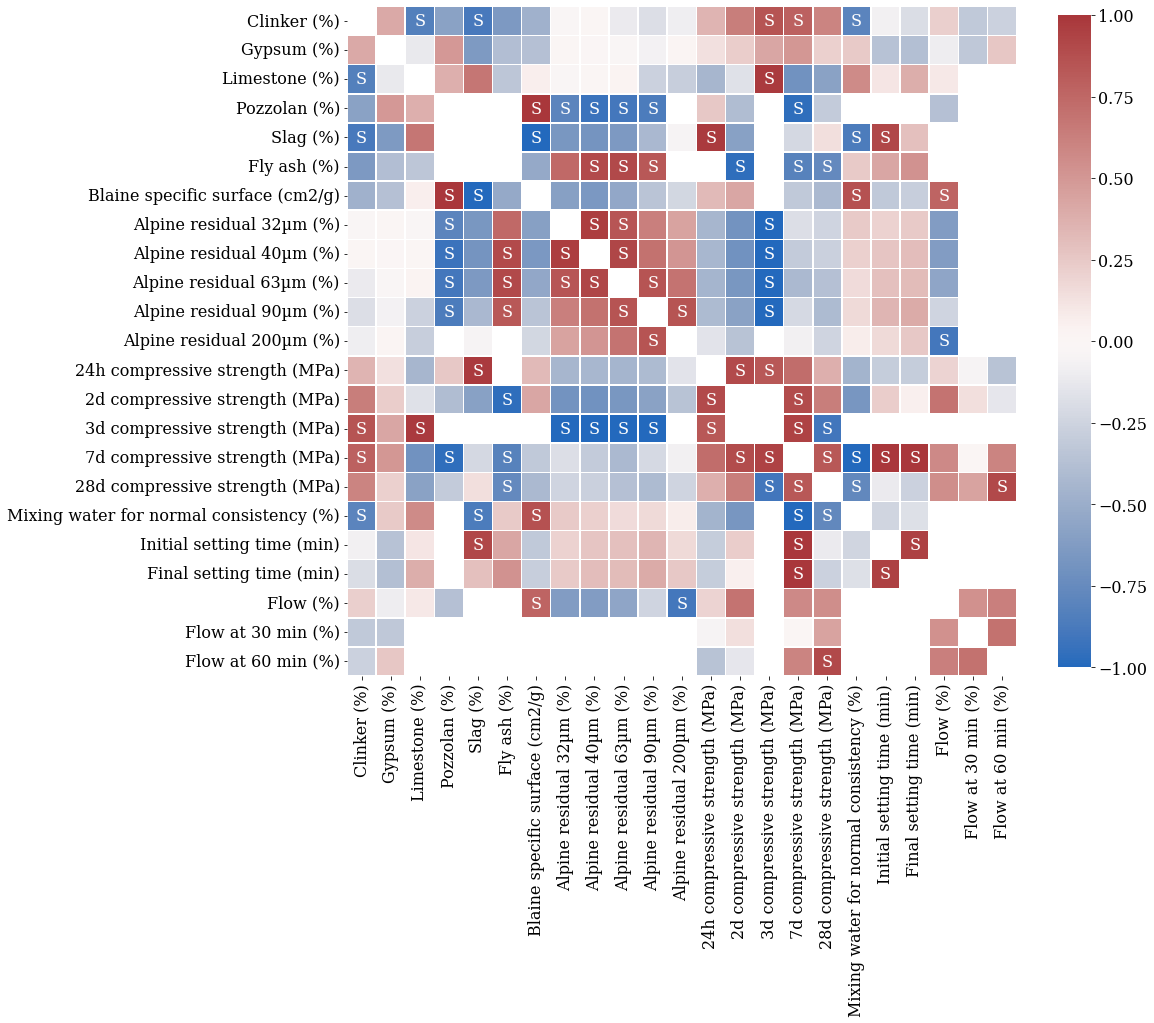

In [33]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr) > 0.75, "S", "")


# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)


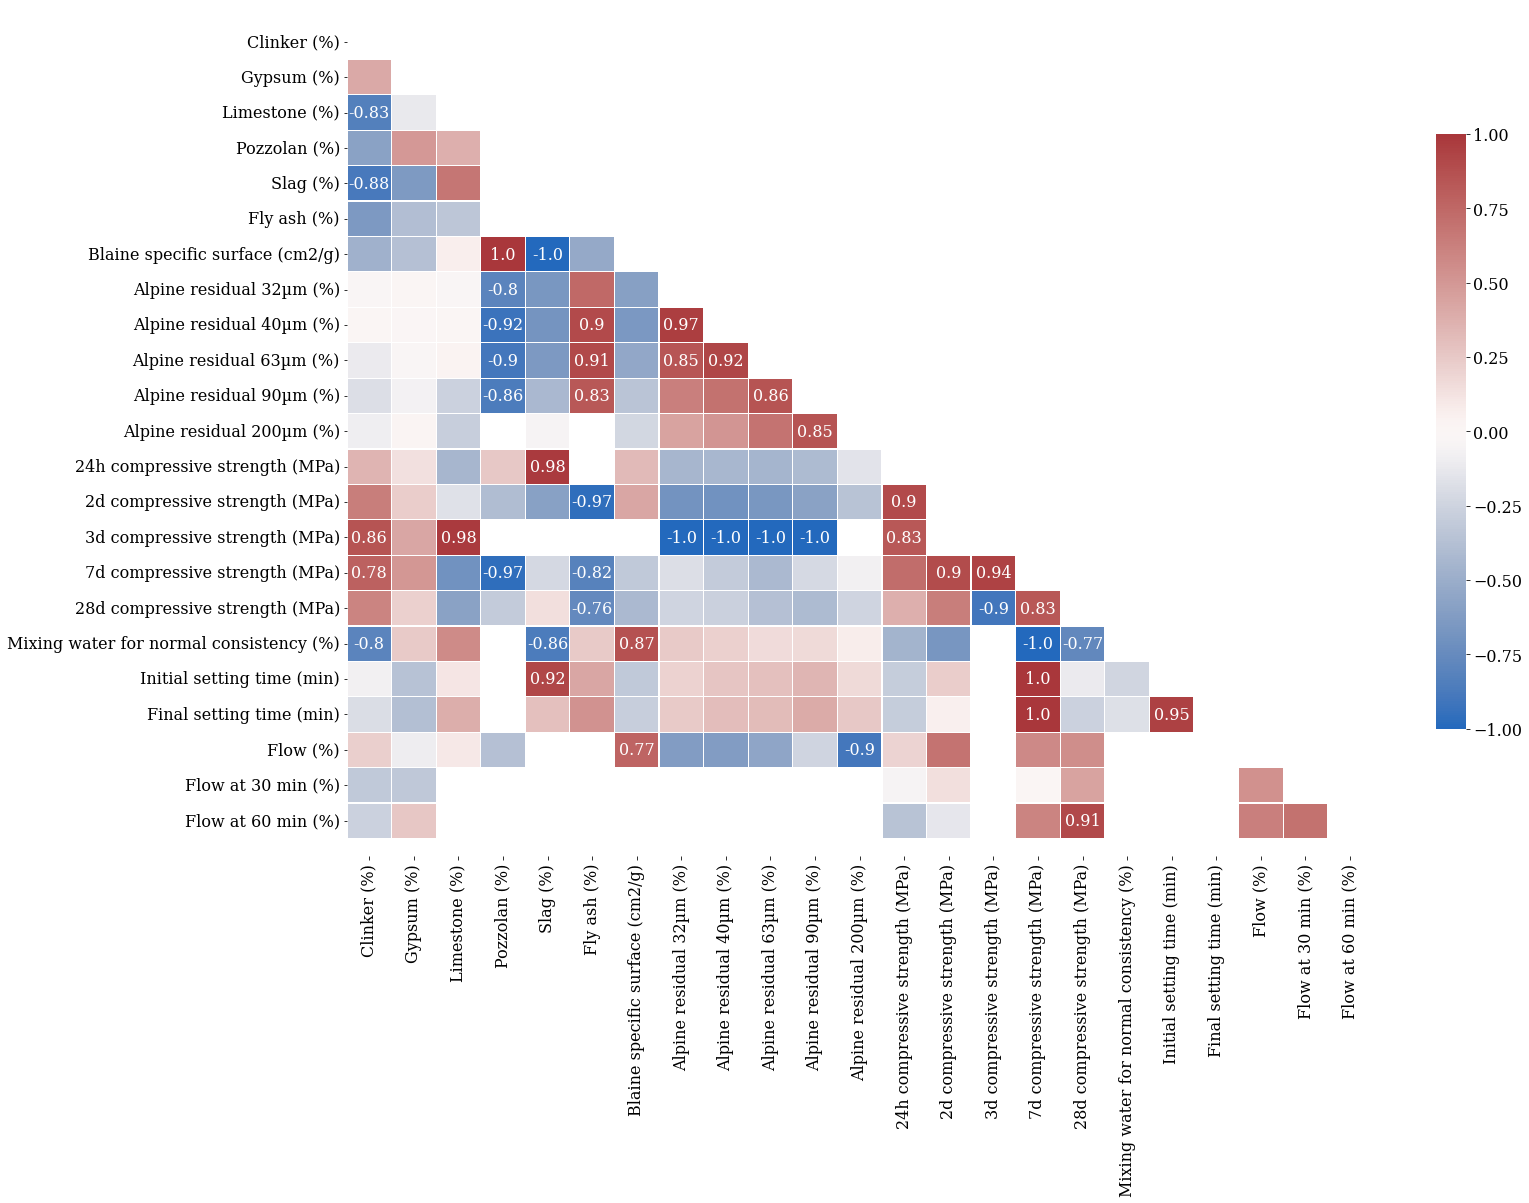

In [34]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) > 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 2), ""
)

# df_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

# Plot correlation matrix
plt.figure(figsize=(23, 17))

ax = sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.2,
    cmap="vlag",
    cbar_kws={"shrink": 0.7},
)

plt.tight_layout()

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .5, top-.5)

# bottom, top = ax.get_xlim()
# ax.set_ylim(bottom + .5, top-.5)
None

In [35]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    return None

In [36]:
sns.set(rc={'figure.figsize':(10, 10)})
sns.set(font_scale=1.1)
sns.set_style("whitegrid", {'axes.grid' : False})
high_correlated_columns = [column for column in df_corr.columns if any(df_corr[column] >= 0.75)]

g = sns.pairplot(
    df[high_correlated_columns].fillna(-99),
    corner=True,
    kind='reg',
    plot_kws={
        'line_kws':{'color':'olive'},
        'scatter_kws': {'alpha': 0.2}
})
g.map_lower(corrfunc)
g.set(xticklabels=[])
g.set(yticklabels=[])
g.fig.suptitle('Synthetic Features vs Each Other');


In [37]:
corr_matrix = df.corr(method="pearson").abs()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
sol[sol > 0.75]

7d compressive strength (MPa)    Mixing water for normal consistency (%)    1.000000
Slag (%)                         Blaine specific surface (cm2/g)            1.000000
7d compressive strength (MPa)    Final setting time (min)                   1.000000
Alpine residual 32µm (%)         3d compressive strength (MPa)              1.000000
Alpine residual 63µm (%)         3d compressive strength (MPa)              1.000000
7d compressive strength (MPa)    Initial setting time (min)                 1.000000
Alpine residual 90µm (%)         3d compressive strength (MPa)              1.000000
Pozzolan (%)                     Blaine specific surface (cm2/g)            1.000000
Alpine residual 40µm (%)         3d compressive strength (MPa)              1.000000
Slag (%)                         24h compressive strength (MPa)             0.978858
Limestone (%)                    3d compressive strength (MPa)              0.977032
Pozzolan (%)                     7d compressive strength (MPa)   

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/axisgrid.py:1242: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


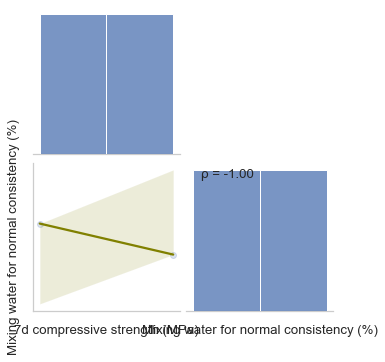

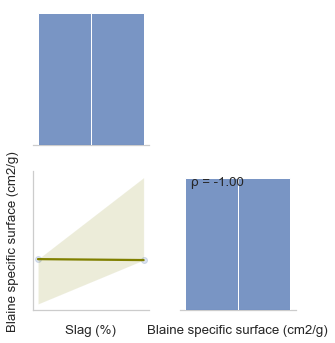

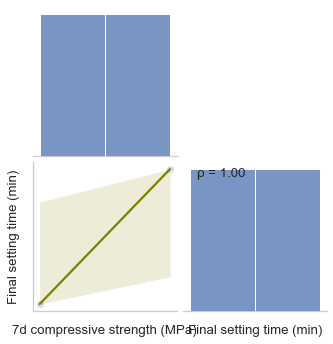

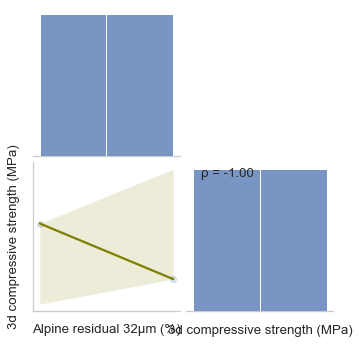

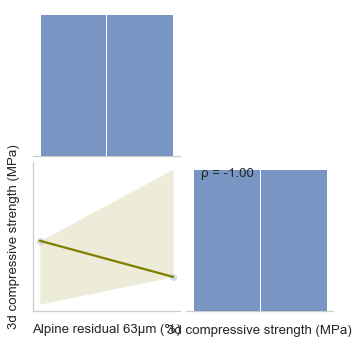

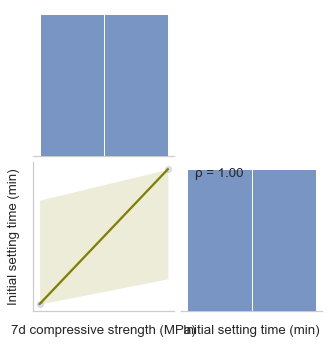

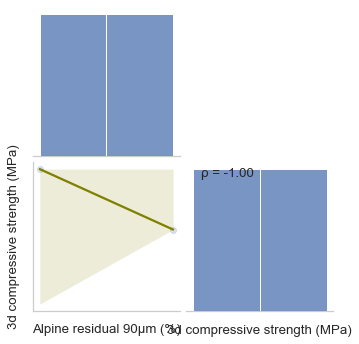

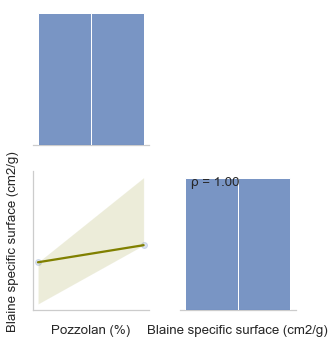

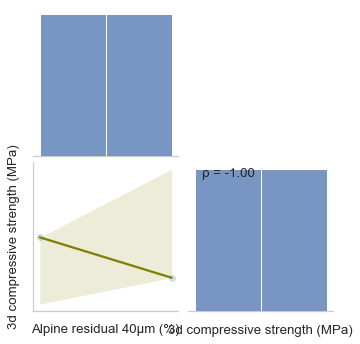

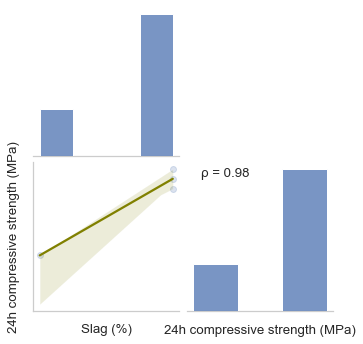

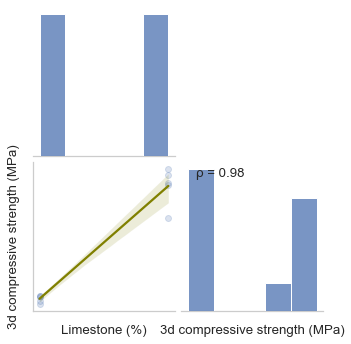

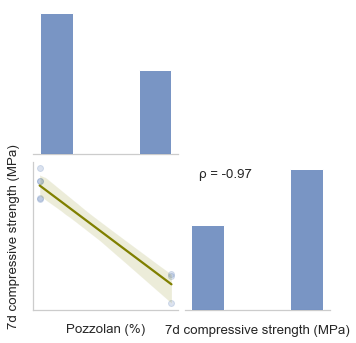

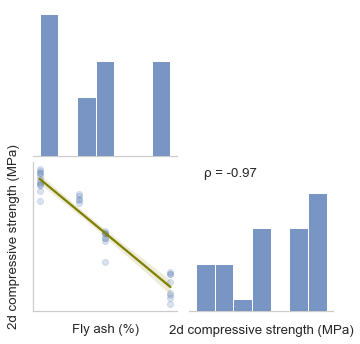

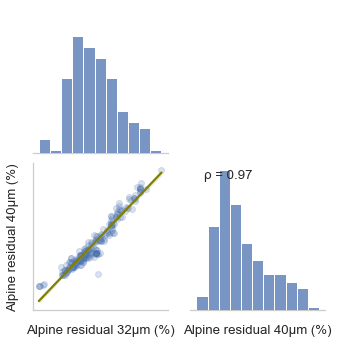

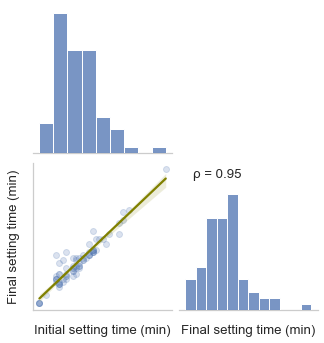

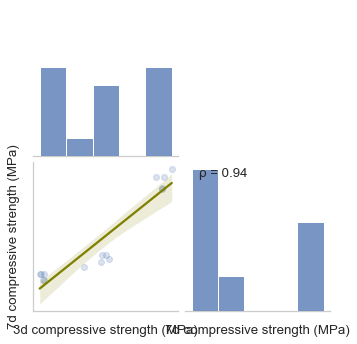

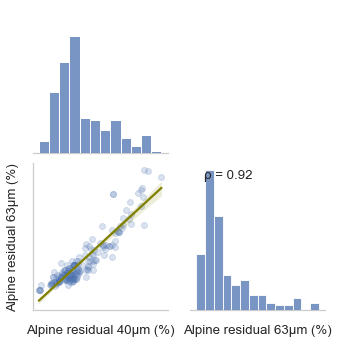

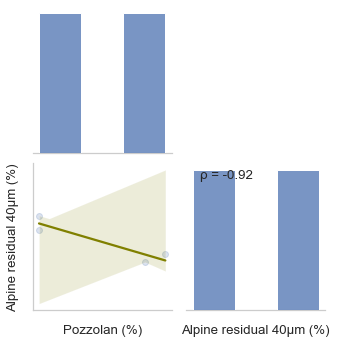

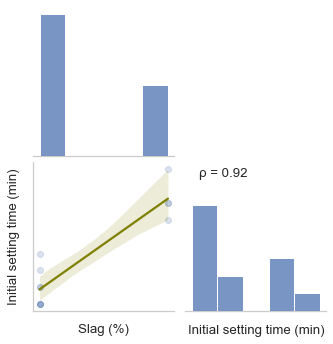

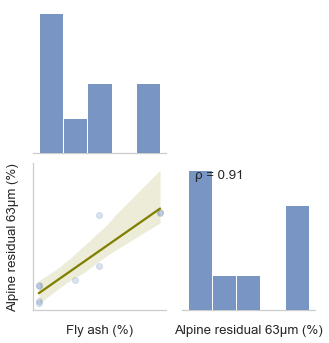

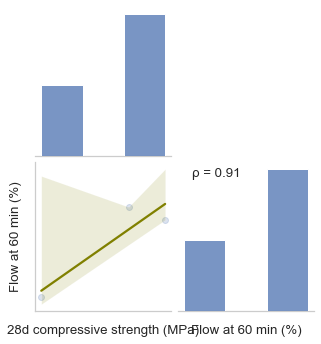

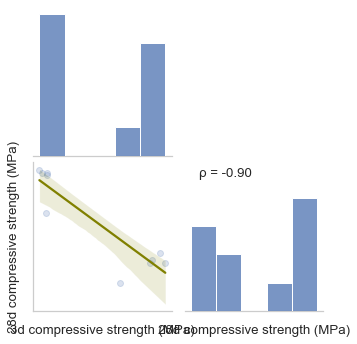

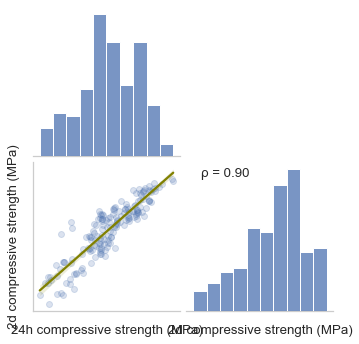

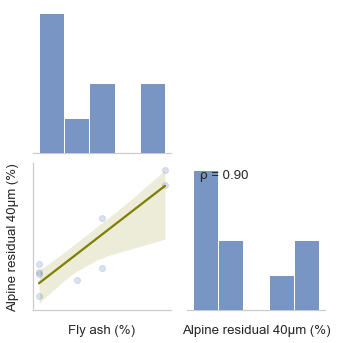

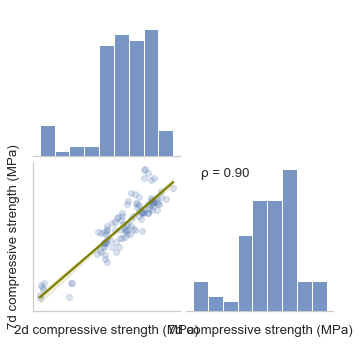

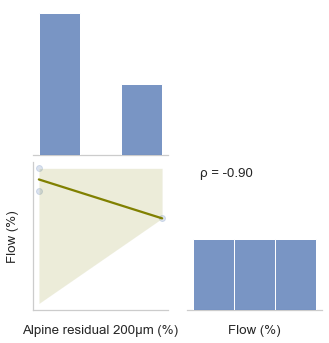

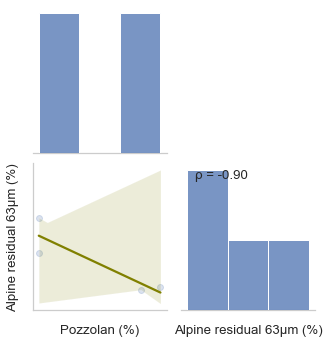

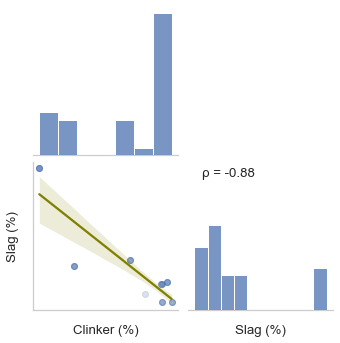

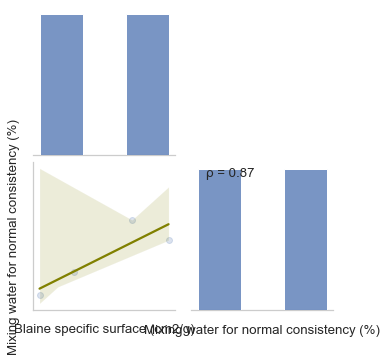

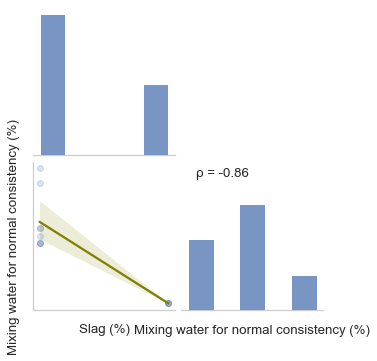

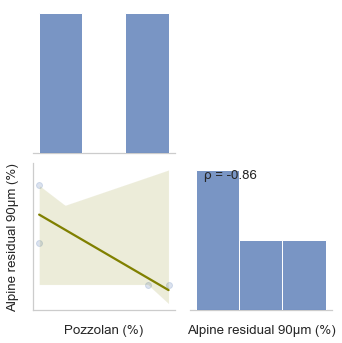

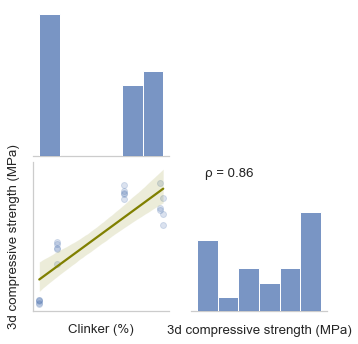

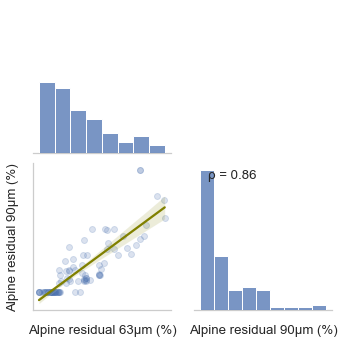

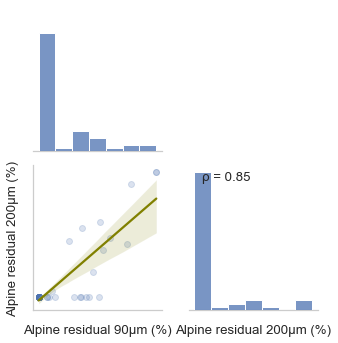

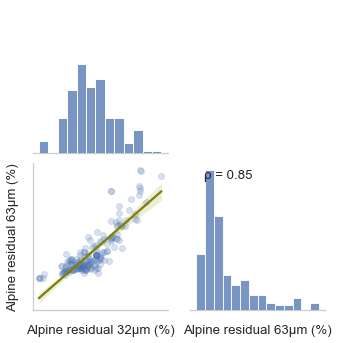

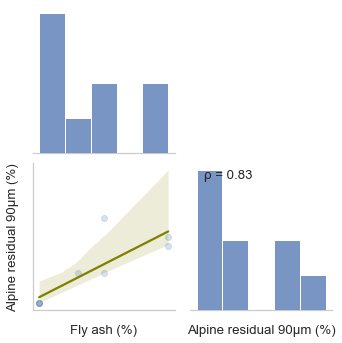

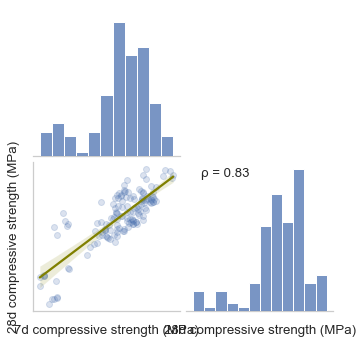

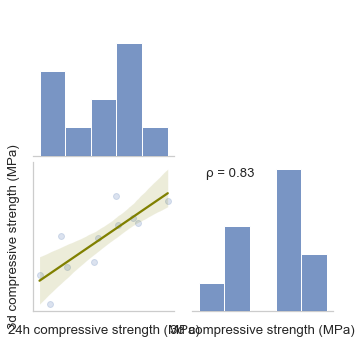

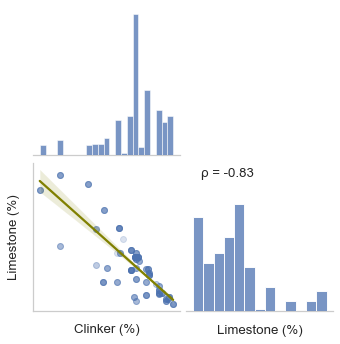

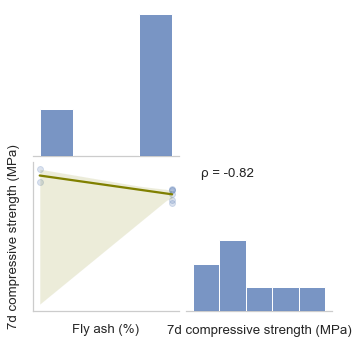

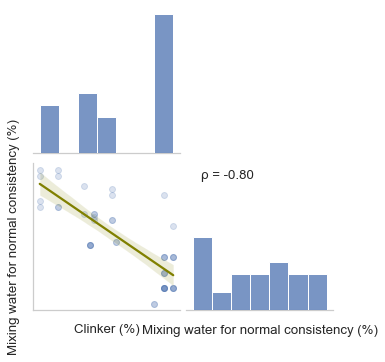

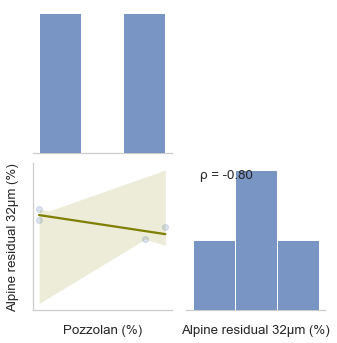

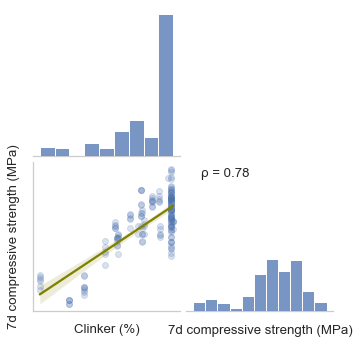

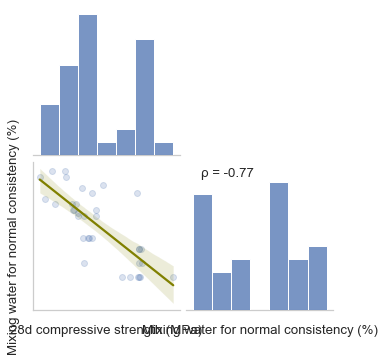

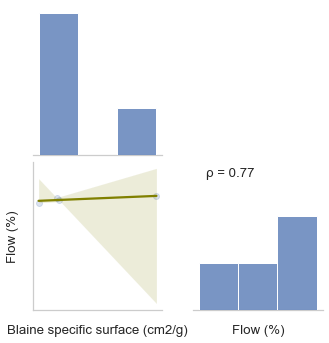

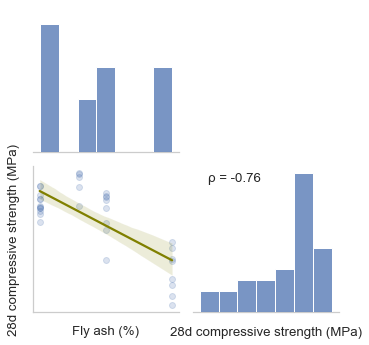

In [38]:
for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind='reg',
            plot_kws={
                'line_kws':{'color':'olive'},
                'scatter_kws': {'alpha': 0.2}
        })
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

In [39]:
# pd.plotting.scatter_matrix(df)

<h2>4. Hidden Features extraction and investigation</h2>

In [40]:
df['Other (%)'].isna().sum()

573

In [41]:
(~df['Other (%)'].isna()).sum()

64

In [42]:
df[~df['Other (%)'].isna()]['Description'].nunique()

7

In [43]:
df[~df['Other (%)'].isna()]['Description'].value_counts()

CEM I          18
CEM II/A-LL    14
CEM II/A-L     13
Cement         11
CEM II/B-S      5
CEM II          2
OPC             1
Name: Description, dtype: int64

In [44]:
df[~df['Other (%)'].isna()]['Other (%)']

132                  Anhydrite 4,2
133                  Anhydrite 3,4
134                  Anhydrite 3,4
135                  Anhydrite 3,4
136                  Anhydrite 3,4
                  ...             
522    0,2% FeSO4x7H20 + 0,1% Dust
523    0,2% FeSO4x7H20 + 0,1% Dust
532    0,2% FeSO4x7H20 + 0,1% Dust
533    0,2% FeSO4x7H20 + 0,1% Dust
534    0,2% FeSO4x7H20 + 0,1% Dust
Name: Other (%), Length: 64, dtype: object

# Basic Fit Testing

In [45]:
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [46]:
def evaluate_model(model, x, y):
    y_pred = model.predict(x)
    rmse = mean_squared_error(y, y_pred, squared=False)
    return rmse

In [47]:
df.columns

Index(['Description', 'Clinker (%)', 'Gypsum (%)', 'Limestone (%)',
       'Pozzolan (%)', 'Slag (%)', 'Fly ash (%)', 'Other (%)',
       'Blaine specific surface (cm2/g)', 'Alpine residual 32µm (%)',
       'Alpine residual 40µm (%)', 'Alpine residual 63µm (%)',
       'Alpine residual 90µm (%)', 'Alpine residual 200µm (%)',
       '24h compressive strength (MPa)', '2d compressive strength (MPa)',
       '3d compressive strength (MPa)', '7d compressive strength (MPa)',
       '28d compressive strength (MPa)',
       'Mixing water for normal consistency (%)', 'Initial setting time (min)',
       'Final setting time (min)', 'Flow (%)', 'Flow at 30 min (%)',
       'Flow at 60 min (%)'],
      dtype='object')

In [48]:
to_keep = [
    'Clinker (%)',
    'Gypsum (%)',
    'Limestone (%)',
    'Pozzolan (%)',
    'Slag (%)',
    'Fly ash (%)',
    'Blaine specific surface (cm2/g)',
    '28d compressive strength (MPa)',
]

df = df[to_keep]
df = df[~df['28d compressive strength (MPa)'].isnull()]

y = df.pop('28d compressive strength (MPa)')
x = df

seed = 47

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = seed)

In [50]:
params = {'n_estimators': 300, 
          'max_depth': 18, 
          'subsample': 1.0,
          'eta': 0.3,
          'colsample_bytree': 1.0,
          'gamma': 0.0, 
          'min_child_weight': 1,
          'reg_alpha': 1,
          'eval_metric':'mae'}


model =  XGBRegressor(**params,
                         objective='reg:linear',
                         random_state=seed, 
                         early_stopping_rounds=200,
                         verbosity=0)
model.fit(x_train, y_train, verbose=True)
score = evaluate_model(model, x_test, y_test)
print(score)

3.4282509153862266


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 720x720 with 0 Axes>

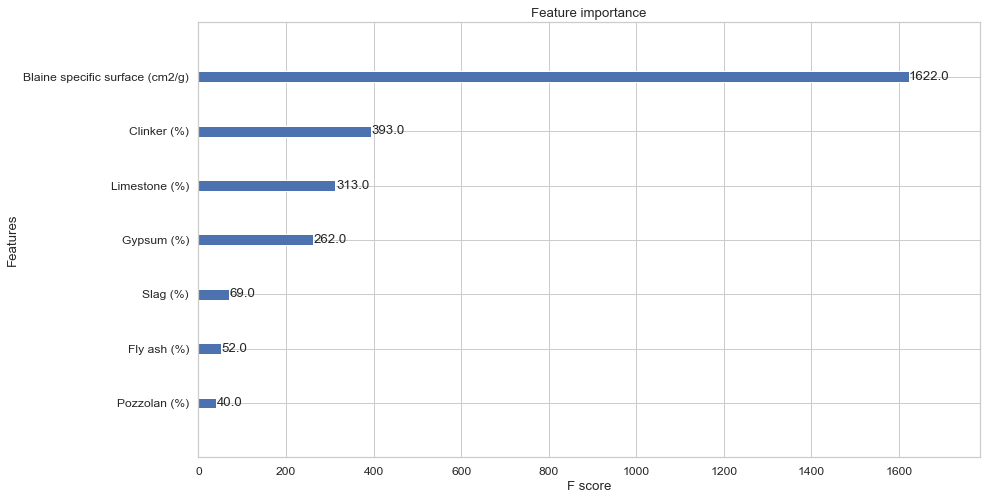

In [51]:
plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = (14, 8)
plot_importance(model)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 720x720 with 0 Axes>

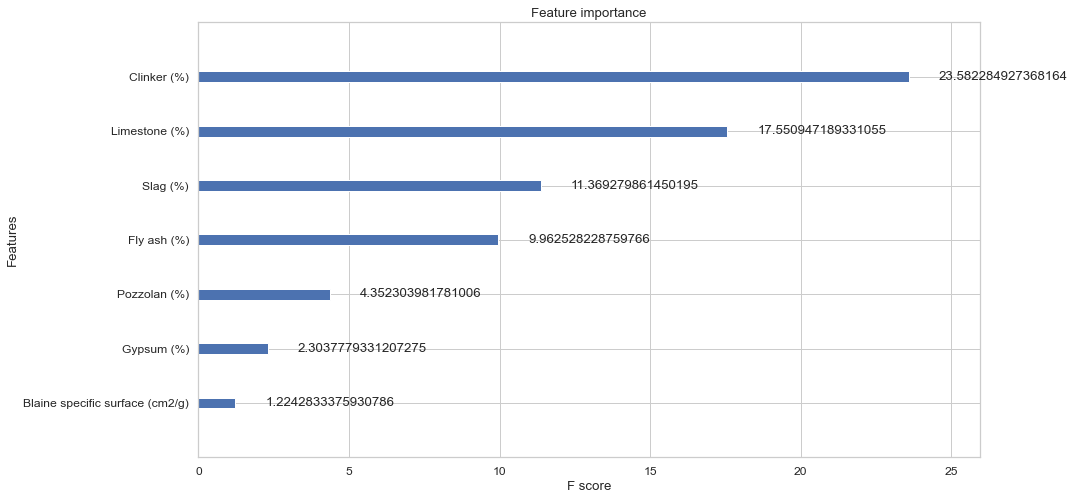

In [52]:
plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = (14, 8)
plot_importance(model, importance_type='gain')